In [1]:
import json
import random
import os
from PIL import Image, ImageOps
from itertools import product
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [25]:
symbol_images_dir = '../data/symbol_images/'

def render_img(img_paths):
    images = [Image.open(symbol_images_dir + x) for x in img_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('L', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    return new_im

In [3]:
dataset = json.load(open('../data/fewshot_dataset.json'))

In [24]:
train_set = []
test_set = []

max_expr_len = 5
n_per_eval = 2
eval_splits = ['I', 'SS', 'LS', 'SL', 'LL']

for fs, data in dataset.items():
	train_data = [x for x in data['train'] if len(x['expr']) <= max_expr_len]
	eval2data = {x: [] for x in eval_splits}
	for x in data['test']:
		eval2data[x['eval']].append(x)
	test_data = []
	
	data = random.sample([x for x in eval2data['SS'] if len(x['expr']) <= max_expr_len], n_per_eval)
	test_data.extend(data)
	data = random.sample([x for x in eval2data['SS'] if len(x['expr']) > max_expr_len and len(x['expr']) <= max_expr_len + 4], n_per_eval)

	for e, d in eval2data.items():
		test_data.extend(random.sample(d, k=n_per_eval))
	train_data = random.sample(train_data, k=10)
	train_set.extend(train_data)
	test_set.extend(test_data)
	print(fs, len(train_data), len(test_data))

x 10 10
y 10 10
a 10 10
b 10 10
c 10 10
d 10 10


In [106]:
train_exprs = list(set([(x['expr'], x['res']) for x in train_set if len(x['expr']) <= 20]))
test_exprs = list(set([(x['expr'], x['res']) for x in test_set]))

In [31]:
dataset = {'train': [], 'test': []}
for split in ['train', 'test']:
    samples = train_set if split == 'train' else test_set
    for i, sample in enumerate(tqdm(samples)):
        res = sample['res']
        expr_img = render_img(sample['img_paths'])
        # print(sample['expr'], res)
        # display(expr_img)
        # input()
        file_name = f'{split}_{i:08d}.jpg'
        expr_img.save('../docs/fewshot/images/' + file_name)
        dataset[split].append(['fewshot/images/' + file_name, res if split == 'train' else '?'])
json.dump(dataset, open('../docs/fewshot/data.json', 'w'))

100%|██████████| 60/60 [00:00<00:00, 703.69it/s]


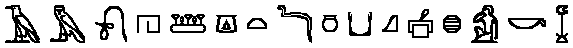

0     1     2     3     4     5     6     7     8     9     +     -     *     /     (     )


In [125]:
display(render_img([str(symbols.index(x) + 1) for x in symbols]))
print('     '.join(symbols))


In [127]:
infixToPostfix(infix)

'7529/2*/+'